<a href="https://colab.research.google.com/github/kashishthakur26/Natural_language_processing/blob/main/Data_cleaning__and_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import spacy

In [2]:
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/twitter-data/master/twitter4000.csv', encoding = 'latin1')

In [4]:
df.head()

,twitts,sentiment
0,is bored and wants to watch a movie any sugge...,0
1,back in miami. waiting to unboard ship,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0
3,ughhh i am so tired blahhhhhhhhh,0
4,@mandagoforth me bad! It's funny though. Zacha...,0


In [5]:
df['sentiment'].value_counts() , df.shape

(0    2000
 1    2000
 Name: sentiment, dtype: int64,
 (4000, 2))

## Word counts

In [6]:
df['word_counts']=df["twitts"].apply(lambda x : len(str(x).split()))


In [7]:
df.sample(5)

,twitts,sentiment,word_counts
3215,great wings game,1,3
898,It's wayyy too early to be awake happy Monday !,0,10
921,i lost my voice..,0,4
2732,So I explored the east a little today. Kaki bu...,1,29
1004,My Twitter's page background is gone. I don't...,0,16


In [8]:
df[df['word_counts']==1]

,twitts,sentiment,word_counts
385,homework,0,1
691,@ekrelly,0,1
1124,disappointed,0,1
1286,@officialmgnfox,0,1
1325,headache,0,1
1897,@MCRmuffin,0,1
2542,Graduated!,1,1
2947,reading,1,1
3176,@omeirdeleon,1,1
3470,www.myspace.com/myfinalthought,1,1


## character counts

In [9]:
def char_counts(x):
  s = x.split()
  x = ''.join(s)
  return len(x)


In [10]:
df['char_counts'] = df['twitts'].apply(lambda x: char_counts(str(x)))

## Average Word Length

In [11]:
df['avg_word_len'] = df['char_counts']/df['word_counts']

In [12]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len
0,is bored and wants to watch a movie any sugge...,0,10,43,4.300000
1,back in miami. waiting to unboard ship,0,7,32,4.571429
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,54,4.500000
3,ughhh i am so tired blahhhhhhhhh,0,6,27,4.500000
4,@mandagoforth me bad! It's funny though. Zacha...,0,26,116,4.461538


In [13]:
print(stopwords,'/n')

{'call', 'such', 'above', 'been', 'serious', 'top', 'wherein', 'before', 'anything', 'put', 'off', 'using', 'being', 'so', 'during', 'within', 'up', '’s', 'our', "'ve", 'am', 'by', 'beforehand', 'were', 'own', 'various', '’ve', "'re", 'latter', 'same', 'each', 'already', 'make', 'n‘t', 'across', 'hence', 'under', 'would', 'where', 'myself', 'nobody', 'another', 'anywhere', 'more', 'four', '’re', 'whereafter', 'here', 'namely', 'ourselves', 'used', 'seeming', 'her', 'very', 'on', 'three', 'per', 'yours', 'about', 'perhaps', 'thence', 'should', 'or', 'forty', 'via', 'say', 'move', 'see', 'anyone', 'did', 'due', 'whole', 'are', '’m', 'this', '’d', 'sixty', 'last', 'wherever', 'then', 'back', 'the', 'all', 'whether', 'however', 'themselves', 'throughout', 'neither', 'a', 'ours', 'rather', 'you', 'herein', 'two', 'beyond', 'against', 'whose', 'elsewhere', 'always', 'fifteen', 'name', 'what', 'though', 'empty', 'regarding', 'none', 'mostly', 'one', 'yourselves', 'thereafter', 'give', 'first'

In [14]:
df['stop_words_len']=df['twitts'].apply(lambda x: len([t for t in x.split() if t in stopwords]))

In [15]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len
0,is bored and wants to watch a movie any sugge...,0,10,43,4.300000,5
1,back in miami. waiting to unboard ship,0,7,32,4.571429,3
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,54,4.500000,0
3,ughhh i am so tired blahhhhhhhhh,0,6,27,4.500000,3
4,@mandagoforth me bad! It's funny though. Zacha...,0,26,116,4.461538,13


## Coutn # and @

In [16]:
df['hashtags_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))

In [17]:
df['mention_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))

In [18]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mention_count
1373,@youngQ I think we brokeded twitter I couldn't...,0,14,58,4.142857,6,0,1
313,"head hurts more, stomach hurts less. WTF is w...",0,12,54,4.500000,3,0,0
248,"could not ride yesterday.. of course, today...",0,13,66,5.076923,6,0,0
2613,BANKED at work tonight. &amp; had an amazing w...,1,17,78,4.588235,6,0,0
3601,Travel blog up and running! http://charlenedi...,1,16,103,6.437500,6,0,0


## If numeric digits are present in twitts

In [19]:
x = 'this is 1 and 2'

In [20]:
x.split()

['this', 'is', '1', 'and', '2']

In [21]:
df['numerics_count']=df['twitts'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))

In [22]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mention_count,numerics_count
0,is bored and wants to watch a movie any sugge...,0,10,43,4.300000,5,0,0,0
1,back in miami. waiting to unboard ship,0,7,32,4.571429,3,0,0,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,54,4.500000,0,0,1,0
3,ughhh i am so tired blahhhhhhhhh,0,6,27,4.500000,3,0,0,0
4,@mandagoforth me bad! It's funny though. Zacha...,0,26,116,4.461538,13,0,2,0


## UPPER case words count

In [23]:
df['upper_counts'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isupper()]))

In [24]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mention_count,numerics_count,upper_counts
0,is bored and wants to watch a movie any sugge...,0,10,43,4.300000,5,0,0,0,0
1,back in miami. waiting to unboard ship,0,7,32,4.571429,3,0,0,0,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,54,4.500000,0,0,1,0,1
3,ughhh i am so tired blahhhhhhhhh,0,6,27,4.500000,3,0,0,0,0
4,@mandagoforth me bad! It's funny though. Zacha...,0,26,116,4.461538,13,0,2,0,0


## Preprocessing and cleaning

### Lower case Conversion

In [25]:
 df['twitts'] = df['twitts'].apply(lambda x: str(x).lower())

### Contraction to expansion

In [26]:
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and ",
"won't": "would not",
'dis': 'this',
'bak': 'back',
'brng': 'bring'}

In [27]:
def cont_to_exp(x):
  if type(x) is str:
    for key in contractions:
      value = contractions[key]
      x = x.replace(key, value)
    return x
  else:
    return x

In [28]:
%%timeit
df['twitts'] = df['twitts'].apply(lambda x: cont_to_exp(x))

91.4 ms ± 22 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Count and remove Emails

In [29]:
import re

In [30]:
x = '@securerecs arghh me please  markbradbury_16@hotmail.com'

In [31]:
re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)', x)

['markbradbury_16@hotmail.com']

In [32]:
df['emails'] = df['twitts'].apply(lambda x: re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)', x))

In [33]:
df['emails_count'] = df['emails'].apply(lambda x: len(x))

In [34]:
df[df['emails_count']>0]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mention_count,numerics_count,upper_counts,emails,emails_count
3713,@securerecs arghh me please markbradbury_16@h...,1,5,51,10.2,0,0,1,0,0,[markbradbury_16@hotmail.com],1


In [36]:
re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"",x)

'@securerecs arghh me please  '

In [37]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x))

In [38]:
df[df['emails_count']>0]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mention_count,numerics_count,upper_counts,emails,emails_count
3713,@securerecs arghh me please,1,5,51,10.2,0,0,1,0,0,[markbradbury_16@hotmail.com],1


### Count URLs and Remove it

In [39]:
x = 'hi, thanks to watching it. for more visit https://youtube.com/kgptalkie'

In [40]:
re.findall(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)

[('https', 'youtube.com', '/kgptalkie')]

In [41]:
df['url_flags'] = df['twitts'].apply(lambda x: len(re.findall(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)))

In [42]:
df[df['url_flags']>0].sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mention_count,numerics_count,upper_counts,emails,emails_count,url_flags
2902,http://twitpic.com/7j5a6 - olthish picture of me,1,6,42,7.000000,2,0,0,0,0,[],0,1
3262,http://twitpic.com/7ipyl - climbing into bed t...,1,14,79,5.642857,5,0,0,0,0,[],0,1
1704,mondays often mean back to work. sigh. http:/...,0,8,56,7.000000,3,0,0,0,0,[],0,1
2533,just got my page setup on flickr and joined so...,1,13,71,5.461538,5,0,0,0,0,[],0,1
2515,audio: viasandiego: this song is great http:/...,1,7,60,8.571429,2,0,0,0,0,[],0,1


In [43]:
re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x)

'hi, thanks to watching it. for more visit '

In [44]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x))

In [45]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mention_count,numerics_count,upper_counts,emails,emails_count,url_flags
848,@ginagirl916 the 1st one is way hot!!! you &a...,0,19,76,4.000000,8,0,1,0,2,[],0,0
3868,yay gamestops across the us r done and cant do...,1,25,121,4.840000,10,0,0,0,1,[],0,0
537,@krrptd1 yeah it is but i felt like sharing it...,0,19,80,4.210526,9,0,2,0,1,[],0,0
1319,three out of the six cases are from my beloved...,0,13,66,5.076923,8,0,0,0,0,[],0,1
856,@i_am_heather some guys just seem able to grow...,0,22,103,4.681818,10,0,1,0,0,[],0,0


### Remove RT(retweet)

In [46]:
df[df['twitts'].str.contains('rt')]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mention_count,numerics_count,upper_counts,emails,emails_count,url_flags
4,@mandagoforth me bad! it is funny though. zach...,0,26,116,4.461538,13,0,2,0,0,[],0,0
23,"ut oh, i wonder if the ram on the desktop is s...",0,14,46,3.285714,7,0,0,0,2,[],0,0
59,@paulmccourt dunno what sky you're looking at!...,0,15,80,5.333333,3,0,1,0,0,[],0,0
75,im back home in belfast im realli tired thoug...,0,22,84,3.818182,9,0,0,0,1,[],0,0
81,@lilmonkee987 i know what you mean... i feel s...,0,11,48,4.363636,5,0,1,0,0,[],0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3913,for the press so after she recovered she kille...,1,24,100,4.166667,1,0,0,0,0,[],0,0
3919,earned her cpr &amp; first aid certifications!,1,7,40,5.714286,1,0,0,0,1,[],0,0
3945,"@teciav &quot;i look high, i look low, i look ...",1,23,106,4.608696,10,0,1,0,0,[],0,0
3951,i am soo very parched. and hungry. oh and i am...,1,21,87,4.142857,7,0,0,2,1,[],0,0


In [47]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'\brt\b', '', x).strip())

### Special Chars removal or punctuation removal

In [48]:
re.sub(r'[^\w ]+', "", x)

'hi thanks to watching it for more visit httpsyoutubecomkgptalkie'

In [49]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'[^\w ]+', "", x))

### Remove multiple spaces `"hi   hello    "`

In [50]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join(x.split()))

### Remove HTML tags

In [51]:
from bs4 import BeautifulSoup

In [52]:
%%time
df['twitts'] = df['twitts'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text().strip())

CPU times: user 967 ms, sys: 24.5 ms, total: 992 ms
Wall time: 1.02 s


### Remove Accented Chars

In [53]:
import unicodedata

In [54]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [55]:
remove_accented_chars(x)

'hi, thanks to watching it. for more visit https://youtube.com/kgptalkie'

In [56]:
df['twitts'] = df['twitts'].apply(lambda x: remove_accented_chars(x))

### Remove Stop Words

In [57]:
df['twitts_no_stop'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in stopwords]))

In [58]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mention_count,numerics_count,upper_counts,emails,emails_count,url_flags,twitts_no_stop
2523,ah but yet god is with me all the way he is a ...,1,15,43,2.866667,9,0,0,0,0,[],0,0,ah god way great god
478,traceydukes contd drinkingbut i really cooked,0,6,46,7.666667,1,0,1,0,1,[],0,0,traceydukes contd drinkingbut cooked
2961,is starting her shift short shift amp off tmrr...,1,10,51,5.100000,3,0,0,0,0,[],0,0,starting shift short shift amp tmrrw finally
2443,i am trying to work but am highly thistracted ...,1,17,80,4.705882,8,0,0,0,0,[],0,0,trying work highly thistracted interesting peo...
1945,what a rainy f1 force india seem so lost in sh...,0,11,43,3.909091,4,0,0,0,1,[],0,0,rainy f1 force india lost shanghai


### Convert into base or root form of word

In [59]:
nlp = spacy.load('en_core_web_sm')

In [60]:
x = 'this is chocolates. what is times? this balls'

In [61]:
def make_to_base(x):
    x = str(x)
    x_list = []
    doc = nlp(x)

    for token in doc:
        lemma = token.lemma_
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text

        x_list.append(lemma)
    return ' '.join(x_list)

In [62]:
make_to_base(x)

'this is chocolate . what is time ? this ball'

In [63]:
df['twitts'] = df['twitts'].apply(lambda x: make_to_base(x))

In [64]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mention_count,numerics_count,upper_counts,emails,emails_count,url_flags,twitts_no_stop
211,I have a rip in my pant I know I feel a draft ...,0,14,42,3.000000,5,0,0,0,3,[],0,0,rip pants knew felt draft earlier
3519,court0605 no just a response,1,5,26,5.200000,3,0,1,0,0,[],0,0,court0605 response
2457,andrewbuxton thanksshe is a lovely model and f...,1,14,71,5.071429,7,0,1,0,0,[],0,0,andrewbuxton thanksshe lovely model friend alo...
826,littleliverbird maybe I go on a bit less too n...,0,27,109,4.037037,13,0,1,0,1,[],0,0,littleliverbird maybe bit maybe pull bunch fun...
2391,can not wait til this weekend gettin loose in ...,1,13,60,4.615385,4,0,0,0,0,[],0,0,cant wait til weekend gettin loose miami girl ...


### Common words removal

In [66]:
text = ''.join(df['twitts'])
len(text)

269028

In [67]:
text = text.split()
len(text)

50239

In [70]:
freq_comm = pd.Series(text).value_counts()

In [71]:
f20 = freq_comm[:20]

In [72]:
f20

I       2566
to      1450
the     1268
a        951
not      868
you      821
is       793
my       752
and      727
it       632
have     628
do       571
in       557
for      516
of       481
am       478
go       422
that     421
get      414
on       402
dtype: int64

In [73]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in f20]))

In [74]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mention_count,numerics_count,upper_counts,emails,emails_count,url_flags,twitts_no_stop
1825,allergy are kick ass right now,0,7,32,4.571429,3,0,0,0,0,[],0,0,allergies kicking ass right
2843,nathaliecaron re right if they are base us the...,1,21,111,5.285714,8,0,1,0,1,[],0,0,nathaliecaron youre right based violated amend...
1714,carole_hick too far lunch,0,9,36,4.000000,5,0,1,0,0,[],0,0,carole_hicks far lunch
642,missin boo,0,3,11,3.666667,0,0,0,0,0,[],0,0,missin boo
132,grays anatomy season finale shortcircuite psyc...,0,17,117,6.882353,4,0,0,0,0,[],0,0,grays anatomy season finale shortcircuited psy...


### Rare words removal

In [75]:
rare20 = freq_comm.tail(20)
df['twitts'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in rare20]))

### Word Cloud Visualization

In [76]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
text = ' '.join(df['twitts'])

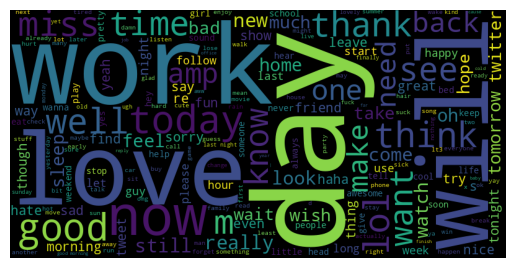

In [78]:
wc = WordCloud(width=800, height=400).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

### Spelling Correction

In [82]:
!pip install -U textblob
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [85]:
from textblob import TextBlob

In [86]:
x = 'thankks forr waching it'

In [87]:
x = TextBlob(x).correct()

In [88]:
x

TextBlob("thanks for watching it")

### Tokenization using TextBlob


In [89]:
x = 'thanks#watching this video. please like it'

In [90]:
TextBlob(x).words

WordList(['thanks', 'watching', 'this', 'video', 'please', 'like', 'it'])

In [91]:
doc = nlp(x)
for token in doc:
    print(token)

thanks#watching
this
video
.
please
like
it


### Detecting Nouns

In [92]:
x = 'Breaking News: Donal Trump, the president of the USA is looking to sign a deal to mine the moon'

In [93]:
doc = nlp(x)

In [94]:
for noun in doc.noun_chunks:
    print(noun)

Donal Trump
the president
the USA
a deal
the moon


### Language Translation and Detection

In [95]:
tb = TextBlob(x)
tb.detect_language()
tb.translate(to = 'zh')

HTTPError: ignored

## Use TextBlob's Inbuilt Sentiment Classifier

In [96]:
from textblob.sentiments import NaiveBayesAnalyzer

In [97]:
x = 'we all stands together. we are gonna win this fight'

In [98]:
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())

In [99]:
tb.sentiment

Sentiment(classification='pos', p_pos=0.9180581552428241, p_neg=0.0819418447571765)